In [1]:
import numpy as np
from matplotlib import pyplot as pl
import os
import scipy.io.wavfile as wav

import mlp_backprop_momentum as mlp
import k_fold_cross_validation as cv

%matplotlib inline

In [2]:
PATH = './vowels/'

SAMPLE_RATE = 24000

EPOCHS = 100
K = 5
LEARNING_RATE = 0.001
MOMENTUM = 0.5
N_HIDDEN_NEURONS = 2
N_INPUT_NEURONS = 13

In [3]:
from python_speech_features import mfcc

In [4]:
files = [file for file in os.listdir(PATH) if file.endswith(".wav")]
all_X = []
for file in files:
    sample_rate, data = wav.read(os.path.join(PATH, file))
    all_X.append([file[:-4], data])
for X in all_X:
    first_letter = X[0][0]
    if first_letter == "n":
        X.append(1)
    else:
        X.append(-1)
    if X[0][1] == 'k':
        X.append(0)
    else:
        if X[0][2] == 'f':
            X.append(1)
        else:
            X.append(-1)

In [5]:
natural_mf = [X for X in all_X if X[2]== 1 and X[3]!=0]

In [6]:
ceps_array = []

def compute_mfcc_average(data):
    return np.average(mfcc(data[1], samplerate=SAMPLE_RATE, nfft=1024), axis = 0)

ceps_array=([compute_mfcc_average(X) for X in natural_mf])

In [7]:
label_array = ([X[3] for X in natural_mf])

In [8]:
nn = mlp.MLP([N_INPUT_NEURONS,N_HIDDEN_NEURONS,1], 'tanh')
nn.init_weights()
MSE = nn.fit((ceps_array, label_array),
                                learning_rate=LEARNING_RATE,
                                momentum=MOMENTUM,
                                epochs=EPOCHS)

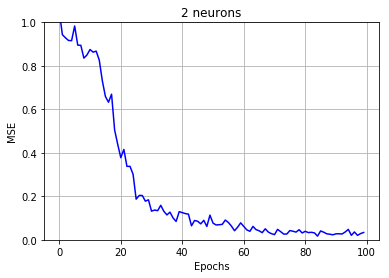

In [9]:
pl.plot(MSE, c='b')
pl.ylim(0,1)
pl.xlabel('Epochs')
pl.ylabel('MSE')
pl.title('2 neurons')
pl.grid()